# Proyek Analisis Data: Capital Bikeshare Bike Sharing Dataset
- **Nama:** Saia Mazaya Fatin
- **Email:** saiavivymaza@gmail.com
- **ID Dicoding:** Saia Mazaya Fatin

## Menentukan Pertanyaan Bisnis

- Question 1: How the weather can affect the number of bike that are rented ?
- Question 2: What is the relationship between temperature and bike rentals?
- Question 3: Which days of the week have the highest and lowest bike rental activity?
- Question 4: How does the time of day by hours influence bike rental patterns on weekdays compared to weekends?
- Question 5: How do bike rental patterns difference between weekdays and weekends? (advanced analysis techniques clustering)

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv') 

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df_hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Assessing Data

In [8]:
def calculate_missing_values_percentage(df):
    missing_values_count = df.isnull().sum()

    total_rows = df.shape[0]

    missing_values_percentage = (missing_values_count / total_rows) * 100

    missing_values_df = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': missing_values_count,
        'Percentage': missing_values_percentage
    })
    return missing_values_df

In [9]:
calculate_missing_values_percentage(df_day)

,Column,Missing Values,Percentage
instant,instant,0,0.0
dteday,dteday,0,0.0
season,season,0,0.0
yr,yr,0,0.0
mnth,mnth,0,0.0
holiday,holiday,0,0.0
weekday,weekday,0,0.0
workingday,workingday,0,0.0
weathersit,weathersit,0,0.0
temp,temp,0,0.0


In [10]:
calculate_missing_values_percentage(df_hour)

,Column,Missing Values,Percentage
instant,instant,0,0.0
dteday,dteday,0,0.0
season,season,0,0.0
yr,yr,0,0.0
mnth,mnth,0,0.0
hr,hr,0,0.0
holiday,holiday,0,0.0
weekday,weekday,0,0.0
workingday,workingday,0,0.0
weathersit,weathersit,0,0.0


In [11]:
print('Duplicate Data from "day.csv": ',df_day.duplicated().sum())
print('Duplicate Data from "hour.csv": ',df_hour.duplicated().sum())

Duplicate Data from "day.csv":  0
Duplicate Data from "hour.csv":  0


In [12]:
def calculate_outlier_percentage(df):
    outlier_percentages = {}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        outlier_percentages[col] = outlier_percentage
    
    outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage'])
    outlier_df = outlier_df.sort_values(by='Outlier Percentage', ascending=False)
    
    return outlier_df

In [13]:
calculate_outlier_percentage(df_day)

,Outlier Percentage
casual,6.019152
holiday,2.872777
windspeed,1.778386
hum,0.273598
instant,0.000000
season,0.000000
yr,0.000000
mnth,0.000000
weekday,0.000000
workingday,0.000000


In [14]:
calculate_outlier_percentage(df_hour)

,Outlier Percentage
casual,6.858853
registered,3.912768
cnt,2.905806
holiday,2.877036
windspeed,1.967892
hum,0.126590
weathersit,0.017262
instant,0.000000
season,0.000000
yr,0.000000


### Conclusion 
There are no duplicate data in the day.csv and hour.csv datasets but there are small outliers from the day.csv and hour.csv datasets

### Cleaning Data  

Because both data have outliers, we can eliminate these outliers using the IQR, Z-Score or other methods. But this time I will use the IQR method.

In [15]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [16]:
columns_to_process_day = ['casual','holiday','windspeed','hum']
columns_to_process_hour = ['casual','registered','cnt','holiday','windspeed','hum']

In [17]:
clean_df_hour = df_hour.copy()
clean_df_day = df_day.copy()

In [18]:
clean_df_hour = remove_outliers_iqr(clean_df_hour,columns_to_process_hour)
clean_df_day = remove_outliers_iqr(clean_df_day,columns_to_process_day)

In [19]:
calculate_outlier_percentage(clean_df_hour)

,Outlier Percentage
casual,3.802962
registered,1.322770
weathersit,0.020668
instant,0.000000
season,0.000000
yr,0.000000
mnth,0.000000
hr,0.000000
holiday,0.000000
weekday,0.000000


In [20]:
calculate_outlier_percentage(clean_df_day)

,Outlier Percentage
casual,2.442748
windspeed,0.305344
instant,0.000000
season,0.000000
yr,0.000000
mnth,0.000000
holiday,0.000000
weekday,0.000000
workingday,0.000000
weathersit,0.000000


After we handle outliers with the IQR method, we can see that the outliers are decreasing but not completely missed. If you want to remove output with 0 percentage you can use another method

In [21]:
clean_df_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     655 non-null    int64  
 1   dteday      655 non-null    object 
 2   season      655 non-null    int64  
 3   yr          655 non-null    int64  
 4   mnth        655 non-null    int64  
 5   holiday     655 non-null    int64  
 6   weekday     655 non-null    int64  
 7   workingday  655 non-null    int64  
 8   weathersit  655 non-null    int64  
 9   temp        655 non-null    float64
 10  atemp       655 non-null    float64
 11  hum         655 non-null    float64
 12  windspeed   655 non-null    float64
 13  casual      655 non-null    int64  
 14  registered  655 non-null    int64  
 15  cnt         655 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.0+ KB


In [22]:
clean_df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14515 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14515 non-null  int64  
 1   dteday      14515 non-null  object 
 2   season      14515 non-null  int64  
 3   yr          14515 non-null  int64  
 4   mnth        14515 non-null  int64  
 5   hr          14515 non-null  int64  
 6   holiday     14515 non-null  int64  
 7   weekday     14515 non-null  int64  
 8   workingday  14515 non-null  int64  
 9   weathersit  14515 non-null  int64  
 10  temp        14515 non-null  float64
 11  atemp       14515 non-null  float64
 12  hum         14515 non-null  float64
 13  windspeed   14515 non-null  float64
 14  casual      14515 non-null  int64  
 15  registered  14515 non-null  int64  
 16  cnt         14515 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.0+ MB


We can change the date feature to datetime because the value is a date

In [23]:
clean_df_day['dteday'] = pd.to_datetime(clean_df_day['dteday'])
clean_df_hour['dteday'] = pd.to_datetime(clean_df_hour['dteday'])

Now we want to change some numerical features (which were originally categorical but with numerical values) to categorical features using.

In [24]:
season_mapping = {
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
}
weathersit_mapping = {
    1: 'Clear/Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
workingday_mapping = {
    1: 'Working Day',
    0: 'Weekend/Holiday'
}
holiday_mapping = {
    1: 'Yes',
    0: 'No'
}
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [25]:
clean_df_day['season'] = clean_df_day['season'].map(season_mapping)
clean_df_hour['season'] = clean_df_hour['season'].map(season_mapping)
clean_df_day['weathersit'] = clean_df_day['weathersit'].map(weathersit_mapping)
clean_df_hour['weathersit'] = clean_df_hour['weathersit'].map(weathersit_mapping)
clean_df_day['workingday'] = clean_df_day['workingday'].map(workingday_mapping)
clean_df_hour['workingday'] = clean_df_hour['workingday'].map(workingday_mapping)
clean_df_day['holiday'] = clean_df_day['holiday'].map(holiday_mapping)
clean_df_hour['holiday'] = clean_df_hour['holiday'].map(holiday_mapping)
clean_df_day['weekday'] = clean_df_day['weekday'].map(weekday_mapping)
clean_df_hour['weekday'] = clean_df_hour['weekday'].map(weekday_mapping)
clean_df_day['mnth'] = clean_df_day['mnth'].map(month_mapping)
clean_df_hour['mnth'] = clean_df_hour['mnth'].map(month_mapping)

We can change the yr to real year based on "dteday" feature

In [26]:
clean_df_day['yr'] = clean_df_day['dteday'].dt.year
clean_df_hour['yr'] = clean_df_hour['dteday'].dt.year

Lastly, we want to change features like "temp", "atemp", "hum", "windspeed" before normalization

In [27]:
clean_df_day['temp'] = clean_df_day['temp']*41
clean_df_day['atemp'] = clean_df_day['atemp']*50
clean_df_day['hum'] = clean_df_day['hum']*100
clean_df_day['windspeed'] = clean_df_day['windspeed']*67

In [28]:
clean_df_hour['temp'] = clean_df_hour['temp']*41
clean_df_hour['atemp'] = clean_df_hour['atemp']*50
clean_df_hour['hum'] = clean_df_hour['hum']*100
clean_df_hour['windspeed'] = clean_df_hour['windspeed']*67

In [29]:
clean_df_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     655 non-null    int64         
 1   dteday      655 non-null    datetime64[ns]
 2   season      655 non-null    object        
 3   yr          655 non-null    int32         
 4   mnth        655 non-null    object        
 5   holiday     655 non-null    object        
 6   weekday     655 non-null    object        
 7   workingday  655 non-null    object        
 8   weathersit  655 non-null    object        
 9   temp        655 non-null    float64       
 10  atemp       655 non-null    float64       
 11  hum         655 non-null    float64       
 12  windspeed   655 non-null    float64       
 13  casual      655 non-null    int64         
 14  registered  655 non-null    int64         
 15  cnt         655 non-null    int64         
dtypes: datetime64[ns](1), float64(4

In [30]:
clean_df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14515 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14515 non-null  int64         
 1   dteday      14515 non-null  datetime64[ns]
 2   season      14515 non-null  object        
 3   yr          14515 non-null  int32         
 4   mnth        14515 non-null  object        
 5   hr          14515 non-null  int64         
 6   holiday     14515 non-null  object        
 7   weekday     14515 non-null  object        
 8   workingday  14515 non-null  object        
 9   weathersit  14515 non-null  object        
 10  temp        14515 non-null  float64       
 11  atemp       14515 non-null  float64       
 12  hum         14515 non-null  float64       
 13  windspeed   14515 non-null  float64       
 14  casual      14515 non-null  int64         
 15  registered  14515 non-null  int64         
 16  cnt         14515 non-null 

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

Summary statistics of each column in the dataset can be
provides a big picture of the state of the data.

In [31]:
clean_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No,Saturday,Weekend/Holiday,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,Weekend/Holiday,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Working Day,Clear/Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Working Day,Clear/Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Working Day,Clear/Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
clean_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.84,14.395,75.0,0.0,0,1,1


Next, we will take the column names for analysis needs

In [33]:
cat_day = clean_df_day.select_dtypes(include=['object']).columns
num_day = clean_df_day.select_dtypes(include=['int', 'float']).columns
cat_hour = clean_df_hour.select_dtypes(include=['object']).columns
num_hour = clean_df_hour.select_dtypes(include=['int', 'float']).columns

In [34]:
clean_df_day[cat_day].describe()

,season,mnth,holiday,weekday,workingday,weathersit
count,655,655,655,655,655,655
unique,4,12,1,7,2,3
top,Fall,August,No,Tuesday,Working Day,Clear/Cloudy
freq,170,60,655,102,490,408


In [35]:
clean_df_day[num_day].describe()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
mean,357.366412,2011.474809,20.145883,23.547324,63.335830,12.476986,737.60000,3660.157252,4397.757252
std,211.948901,0.499747,7.585830,8.221795,14.098968,4.839249,522.93126,1570.067857,1854.957213
min,1.000000,2011.000000,2.424346,3.953480,27.583300,1.500244,2.00000,20.000000,22.000000
25%,174.500000,2011.000000,13.564153,16.492500,52.490000,8.959307,303.50000,2506.500000,3129.000000
50%,348.000000,2011.000000,19.919153,23.705850,63.083300,11.833875,684.00000,3643.000000,4456.000000
75%,544.500000,2012.000000,26.803750,30.398000,73.458300,15.458441,1028.00000,4737.000000,5651.000000
max,731.000000,2012.000000,35.328347,42.044800,97.250000,25.333236,2258.00000,6946.000000,8173.000000


In [36]:
clean_df_hour[cat_hour].describe()

,season,mnth,holiday,weekday,workingday,weathersit
count,14515,14515,14515,14515,14515,14515
unique,4,12,1,7,2,4
top,Spring,December,No,Wednesday,Working Day,Clear/Cloudy
freq,3753,1358,14515,2198,10591,9283


In [37]:
clean_df_hour[num_hour].describe()

,instant,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,14515.000000,14515.000000,14515.000000,14515.000000,14515.000000,14515.000000,14515.000000,14515.000000,14515.000000,14515.000000
mean,8408.953152,2011.473441,11.093214,19.709094,23.101987,64.647124,12.038917,23.172236,118.242783,141.415019
std,5029.273411,0.499311,7.173209,7.806142,8.511775,18.846984,7.496236,26.109116,104.125894,121.482555
min,1.000000,2011.000000,0.000000,0.820000,0.000000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,4065.500000,2011.000000,5.000000,13.120000,15.910000,50.000000,7.001500,3.000000,27.000000,31.000000
50%,8230.000000,2011.000000,11.000000,19.680000,23.485000,65.000000,11.001400,12.000000,97.000000,116.000000
75%,12714.500000,2012.000000,18.000000,26.240000,30.305000,81.000000,16.997900,36.000000,179.000000,222.000000
max,17379.000000,2012.000000,23.000000,41.000000,50.000000,100.000000,31.000900,114.000000,450.000000,508.000000


In [38]:
clean_df_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     655 non-null    int64         
 1   dteday      655 non-null    datetime64[ns]
 2   season      655 non-null    object        
 3   yr          655 non-null    int32         
 4   mnth        655 non-null    object        
 5   holiday     655 non-null    object        
 6   weekday     655 non-null    object        
 7   workingday  655 non-null    object        
 8   weathersit  655 non-null    object        
 9   temp        655 non-null    float64       
 10  atemp       655 non-null    float64       
 11  hum         655 non-null    float64       
 12  windspeed   655 non-null    float64       
 13  casual      655 non-null    int64         
 14  registered  655 non-null    int64         
 15  cnt         655 non-null    int64         
dtypes: datetime64[ns](1), float64(4

In [39]:
clean_df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14515 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14515 non-null  int64         
 1   dteday      14515 non-null  datetime64[ns]
 2   season      14515 non-null  object        
 3   yr          14515 non-null  int32         
 4   mnth        14515 non-null  object        
 5   hr          14515 non-null  int64         
 6   holiday     14515 non-null  object        
 7   weekday     14515 non-null  object        
 8   workingday  14515 non-null  object        
 9   weathersit  14515 non-null  object        
 10  temp        14515 non-null  float64       
 11  atemp       14515 non-null  float64       
 12  hum         14515 non-null  float64       
 13  windspeed   14515 non-null  float64       
 14  casual      14515 non-null  int64         
 15  registered  14515 non-null  int64         
 16  cnt         14515 non-null 

### Univariate Analysis

Analyze each column separately, looking at the distribution
value in detail

In [40]:
def eda_univariate_numeric(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)
    
    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(16, 6 * num_rows))

    for idx, col in enumerate(numeric_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def eda_univariate_categorical(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_columns = len(categorical_columns)

    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(16, 6 * num_rows))

    for idx, col in enumerate(categorical_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Countplot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


In [41]:
def count_values_per_column(df, categorical_columns):
    for col in categorical_columns:
        print(f"Count of values in '{col}':")
        print(df[col].value_counts())
        print("\n" + "="*50 + "\n") 

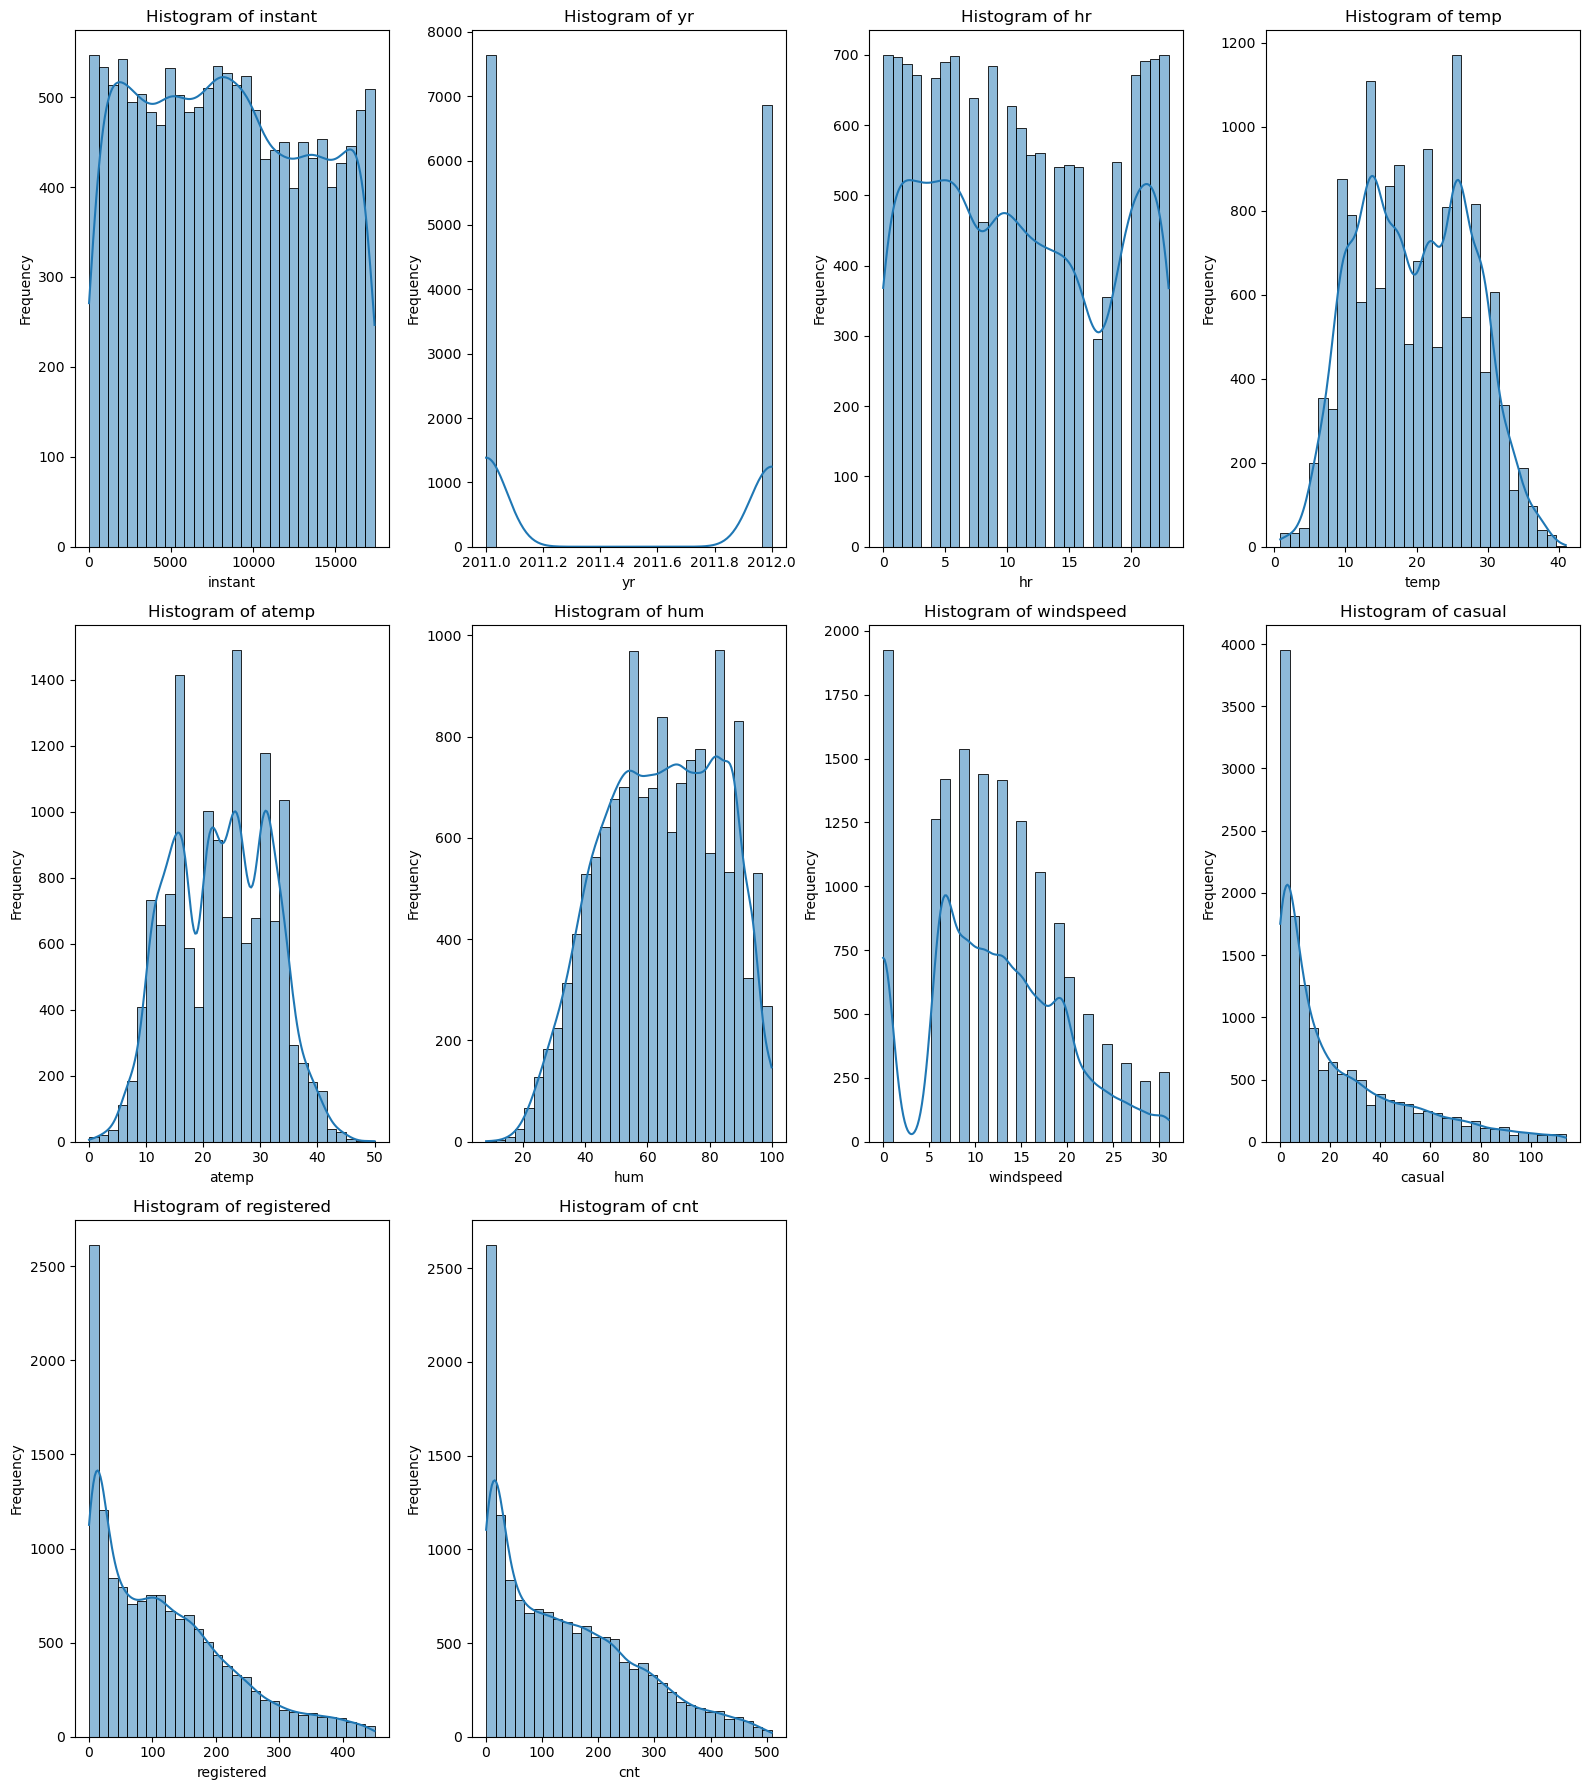

In [42]:
eda_univariate_numeric(clean_df_hour)

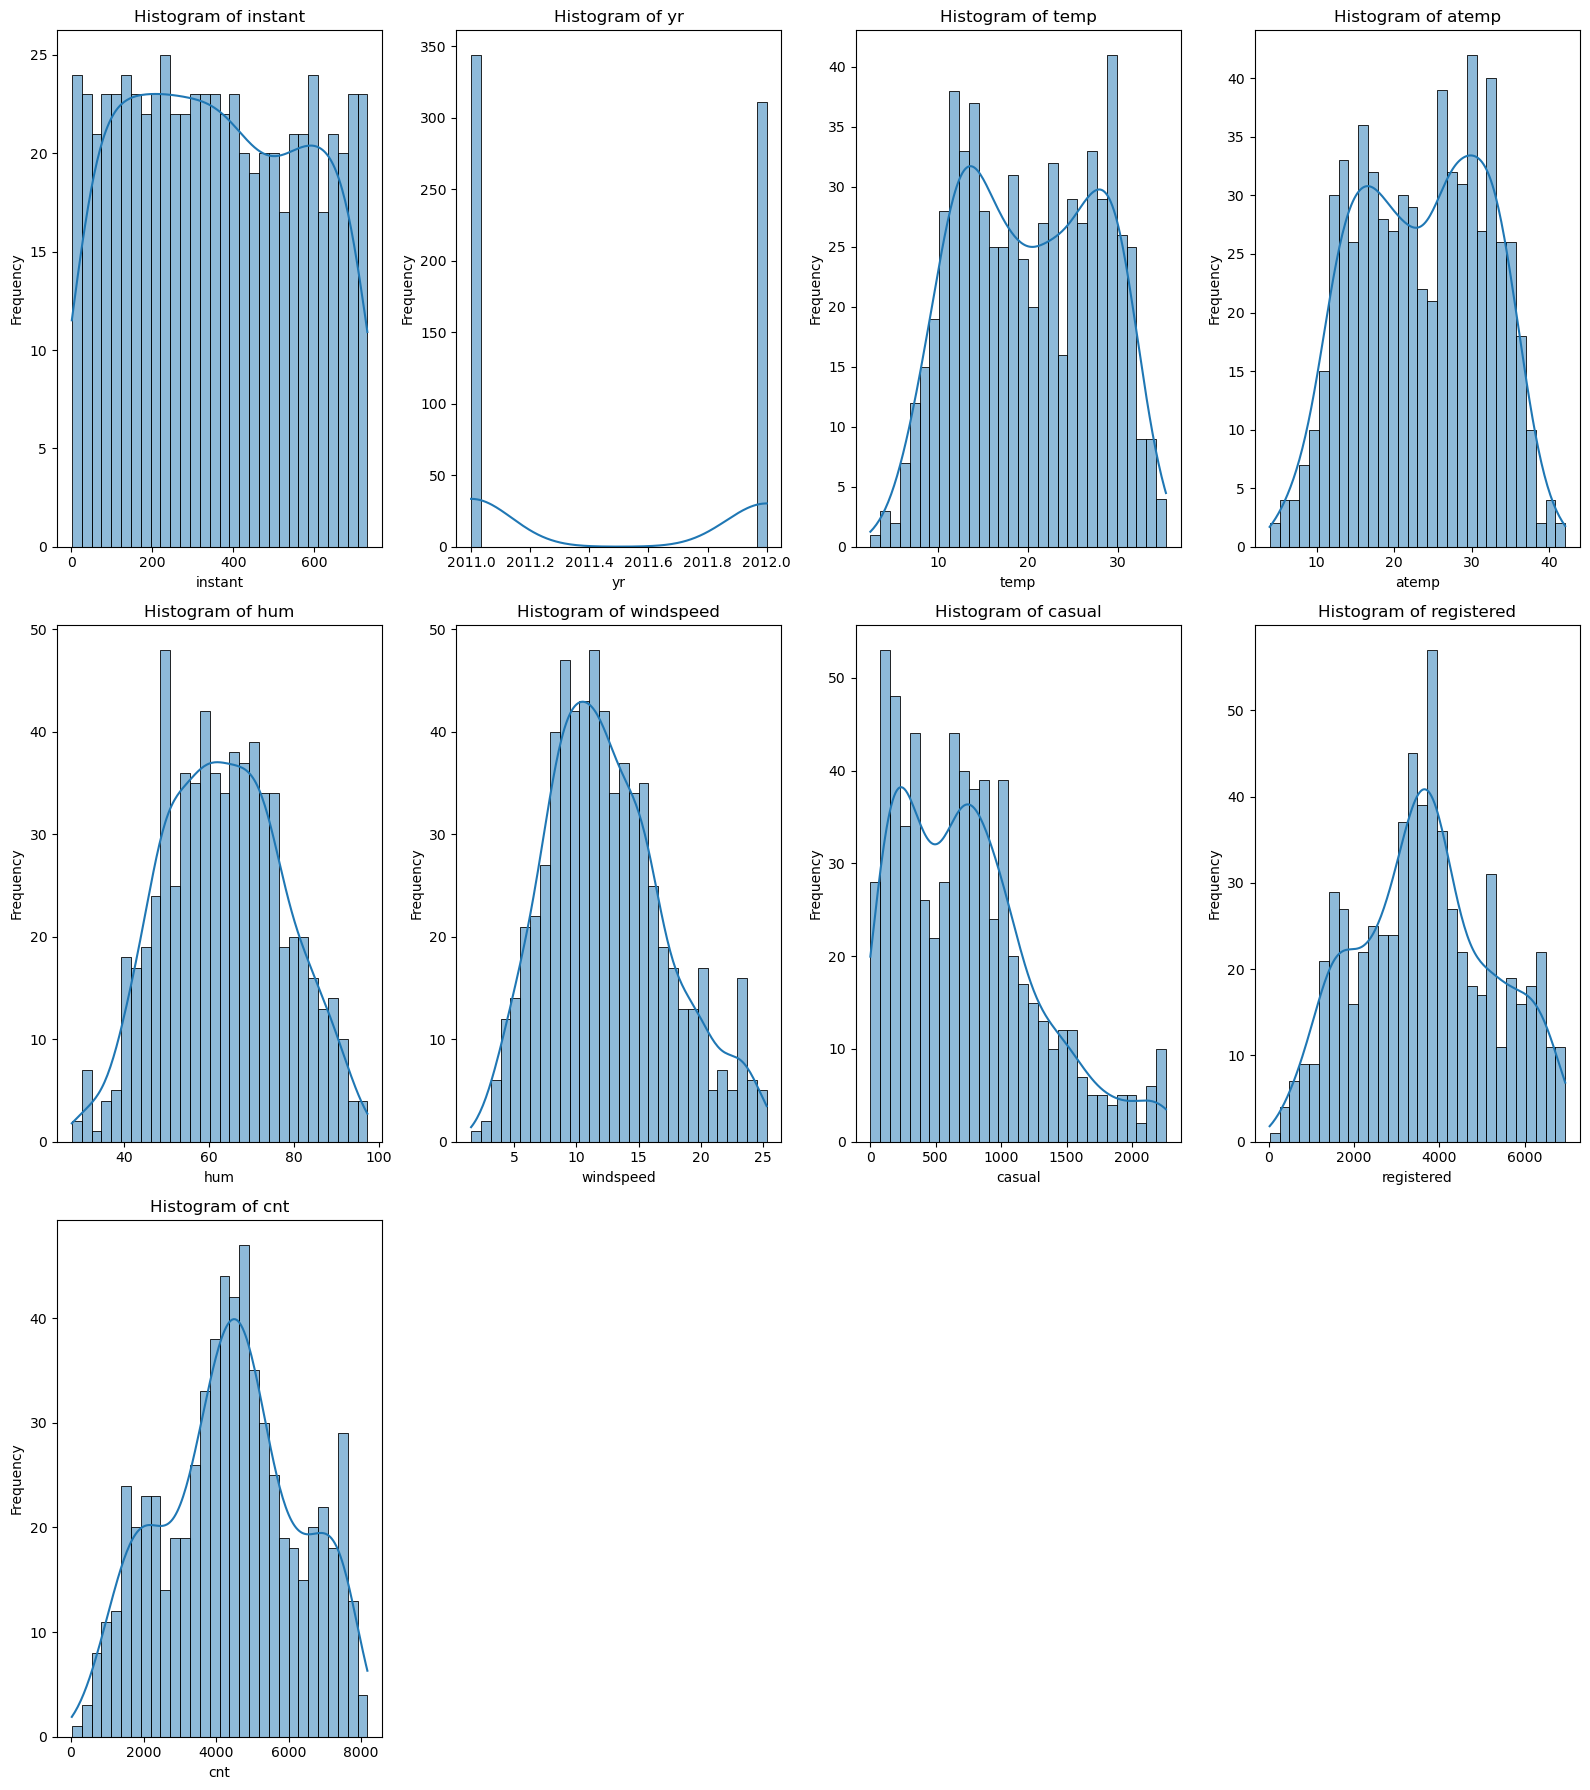

In [43]:
eda_univariate_numeric(clean_df_day)

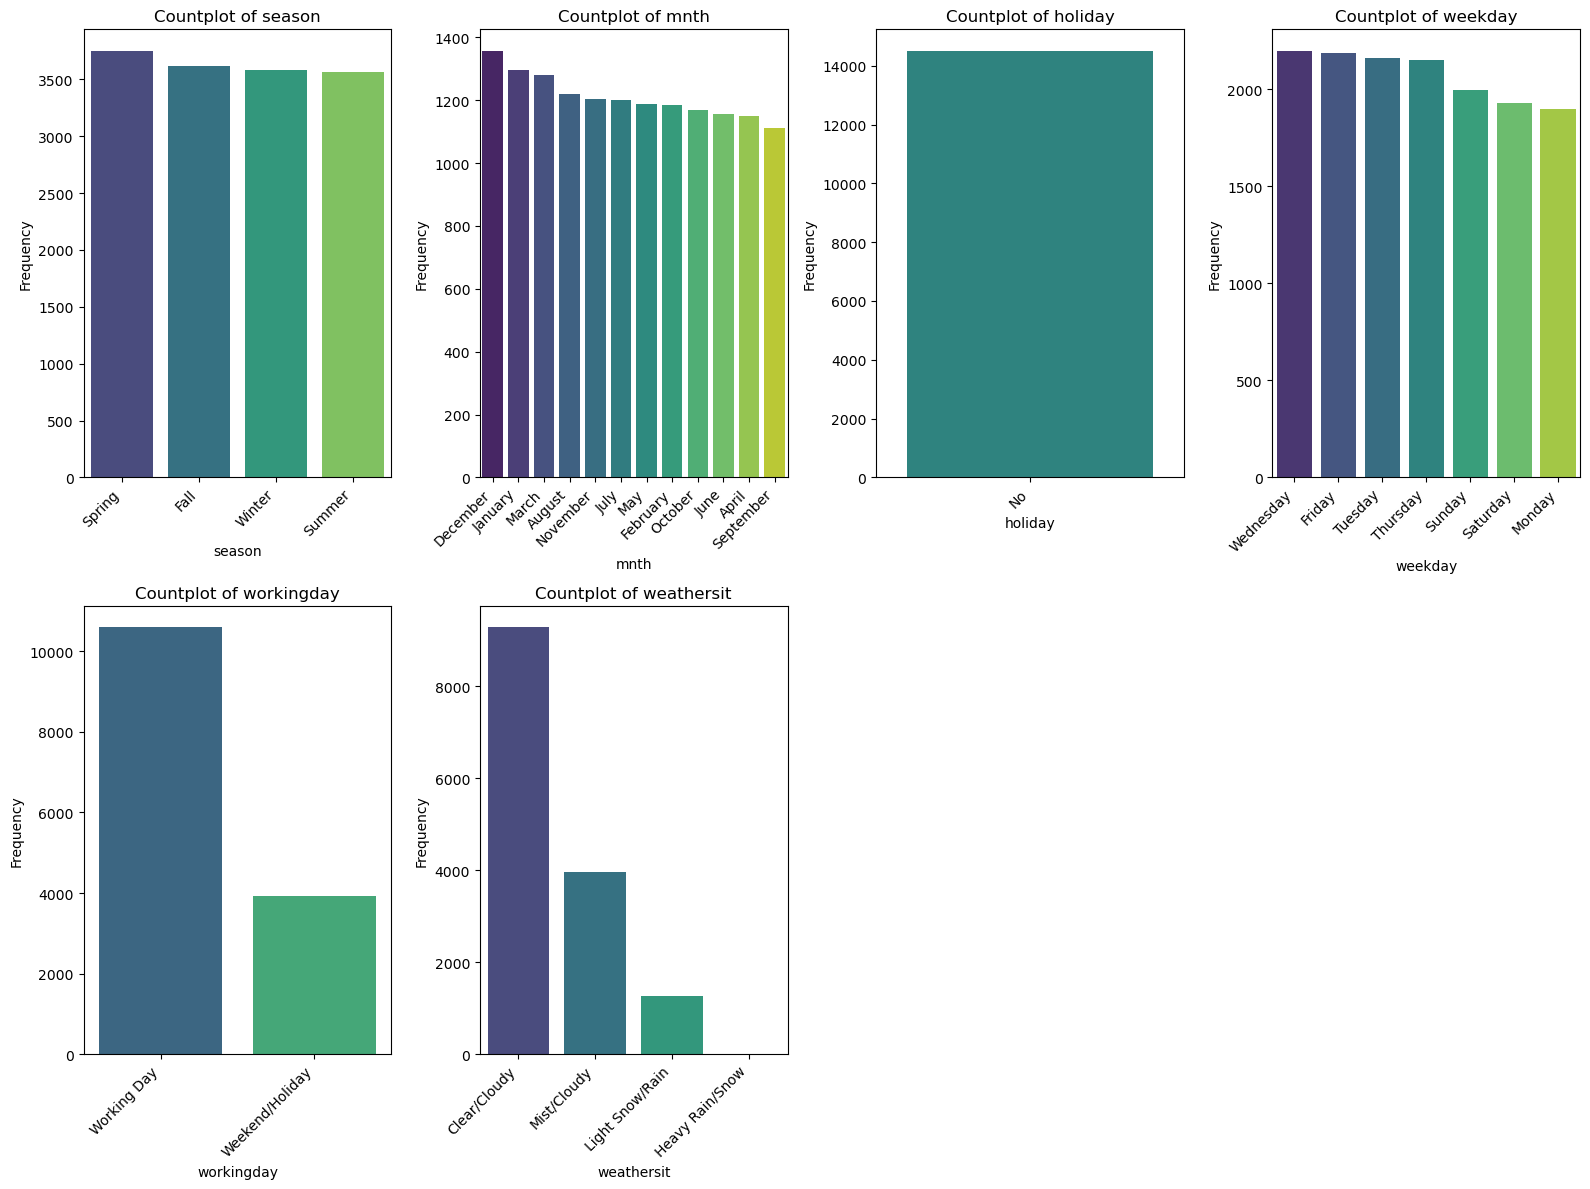

In [44]:
eda_univariate_categorical(clean_df_hour)

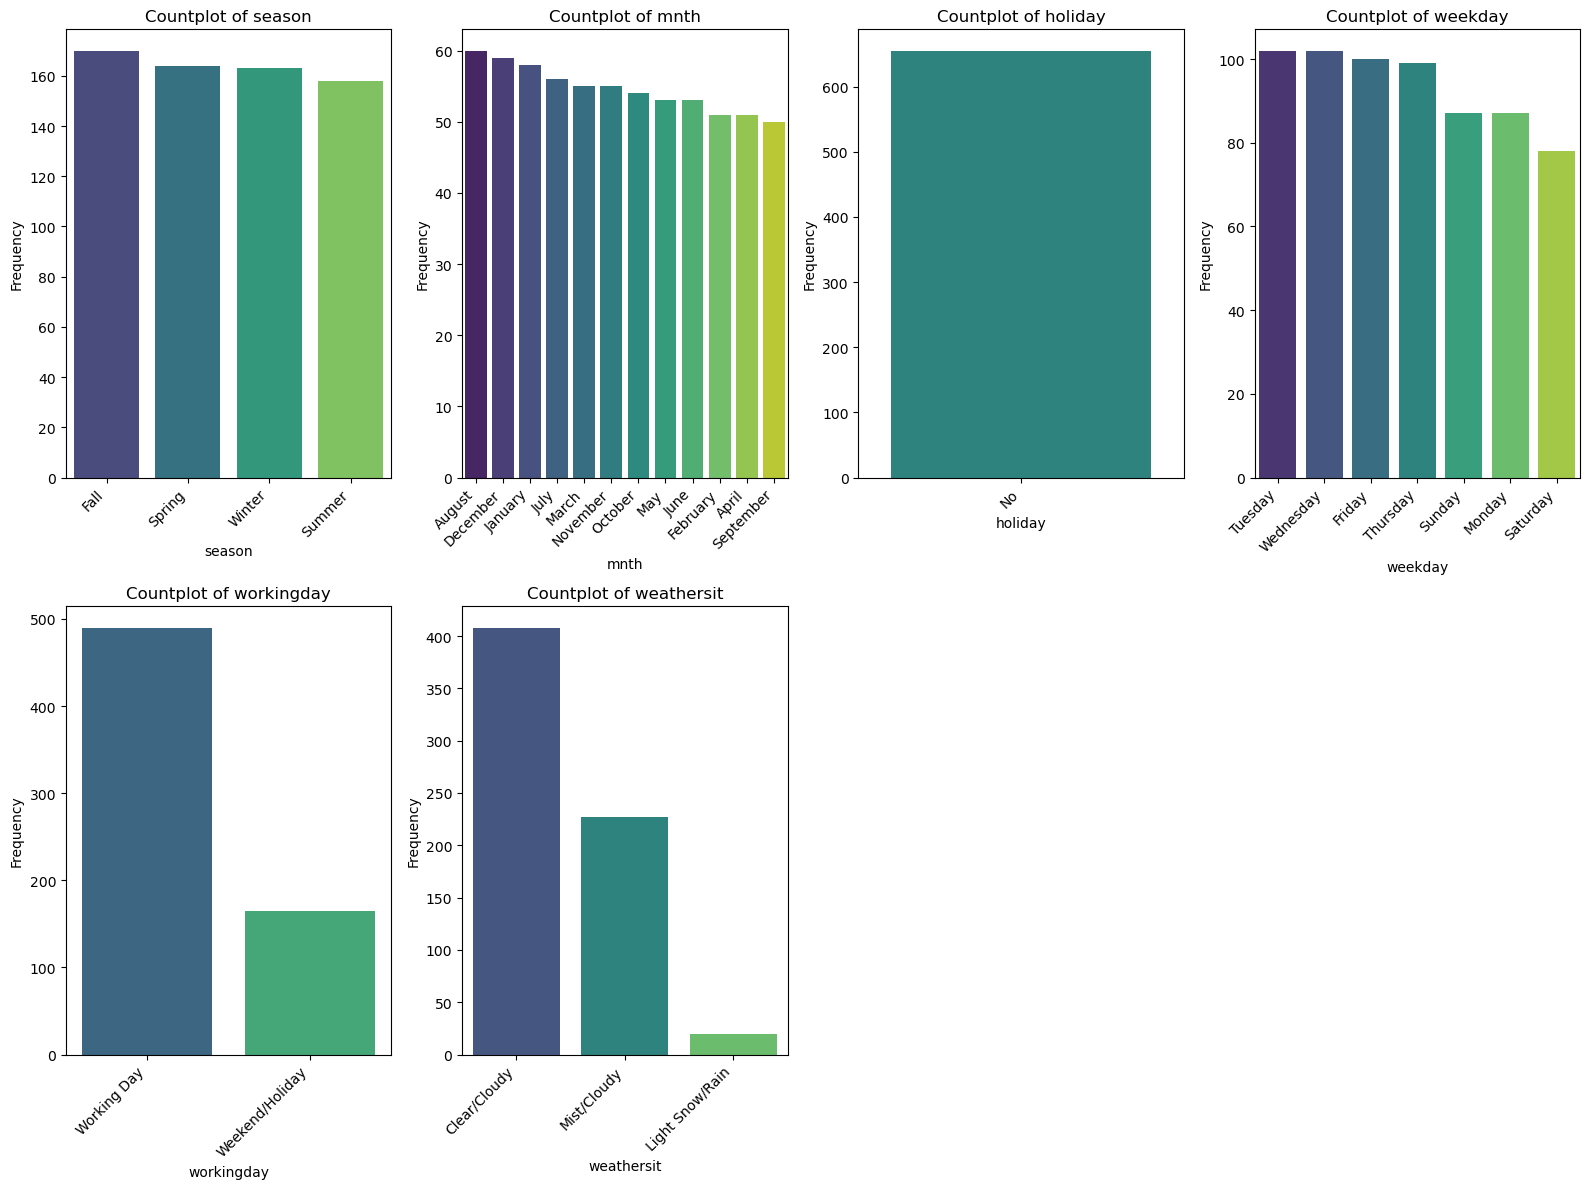

In [45]:
eda_univariate_categorical(clean_df_day)

now we will see how many values ​​per column

In [46]:
count_values_per_column(clean_df_hour, cat_hour)

Count of values in 'season':
season
Spring    3753
Fall      3616
Winter    3585
Summer    3561
Name: count, dtype: int64


Count of values in 'mnth':
mnth
December     1358
January      1297
March        1279
August       1219
November     1205
July         1201
May          1188
February     1184
October      1168
June         1155
April        1150
September    1111
Name: count, dtype: int64


Count of values in 'holiday':
holiday
No    14515
Name: count, dtype: int64


Count of values in 'weekday':
weekday
Wednesday    2198
Friday       2185
Tuesday      2158
Thursday     2150
Sunday       1994
Saturday     1930
Monday       1900
Name: count, dtype: int64


Count of values in 'workingday':
workingday
Working Day        10591
Weekend/Holiday     3924
Name: count, dtype: int64


Count of values in 'weathersit':
weathersit
Clear/Cloudy       9283
Mist/Cloudy        3959
Light Snow/Rain    1270
Heavy Rain/Snow       3
Name: count, dtype: int64




In [47]:
count_values_per_column(clean_df_day, cat_day)

Count of values in 'season':
season
Fall      170
Spring    164
Winter    163
Summer    158
Name: count, dtype: int64


Count of values in 'mnth':
mnth
August       60
December     59
January      58
July         56
March        55
November     55
October      54
May          53
June         53
February     51
April        51
September    50
Name: count, dtype: int64


Count of values in 'holiday':
holiday
No    655
Name: count, dtype: int64


Count of values in 'weekday':
weekday
Tuesday      102
Wednesday    102
Friday       100
Thursday      99
Sunday        87
Monday        87
Saturday      78
Name: count, dtype: int64


Count of values in 'workingday':
workingday
Working Day        490
Weekend/Holiday    165
Name: count, dtype: int64


Count of values in 'weathersit':
weathersit
Clear/Cloudy       408
Mist/Cloudy        227
Light Snow/Rain     20
Name: count, dtype: int64




### Multivariate Analysis

Analyze multiple columns at once to look for relationships
between columns

In [48]:
def eda_multivariate_numeric(df, numerical_columns):
    corr_matrix = df[numerical_columns].corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of Correlation Matrix for Numerical Columns')
    plt.show()

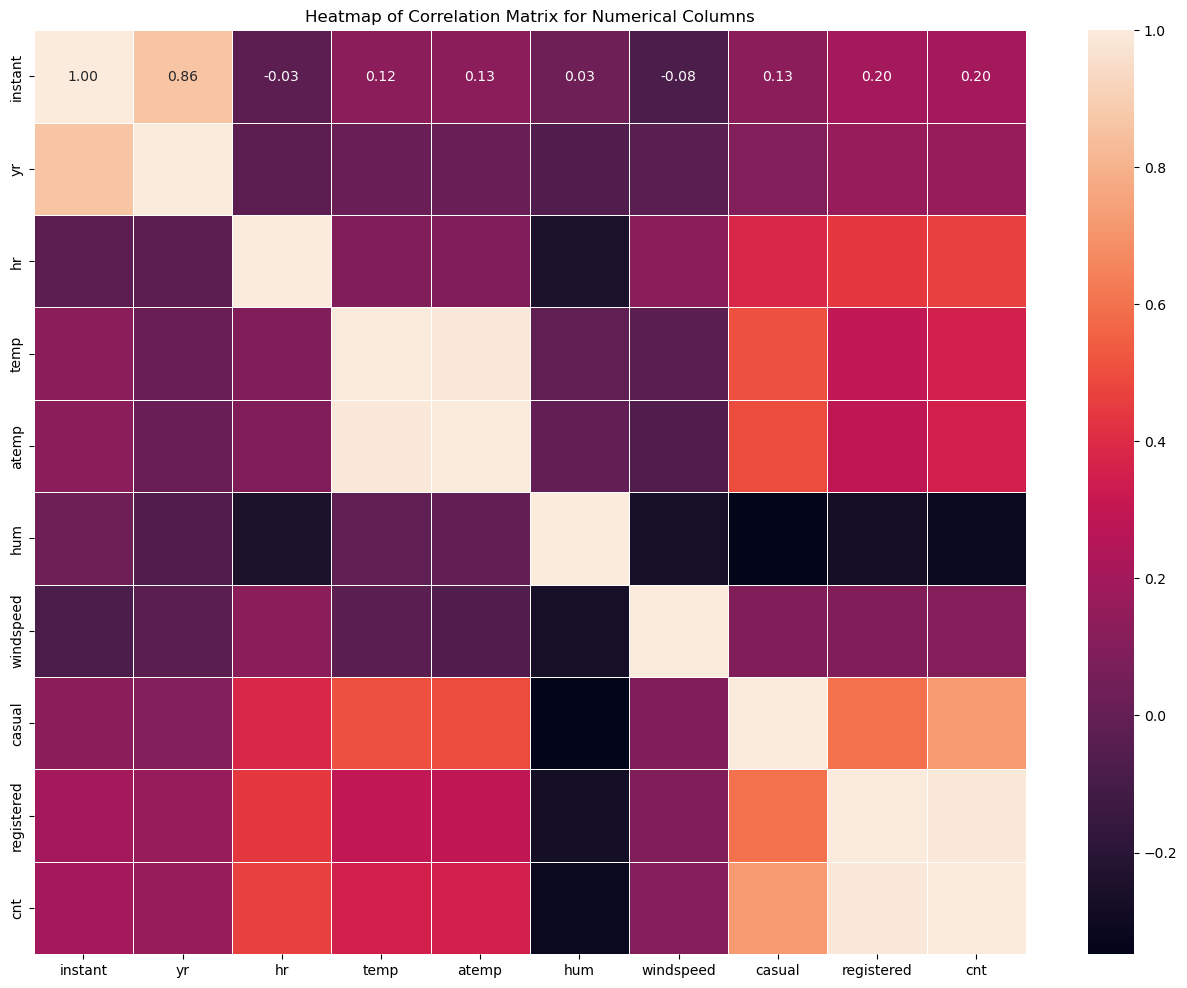

In [49]:
eda_multivariate_numeric(clean_df_hour,num_hour)

In [50]:
clean_df_hour[num_hour].corr()

,instant,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.860740,-0.025655,0.124916,0.125505,0.027959,-0.083832,0.130368,0.202235,0.201360
yr,0.860740,1.000000,-0.025499,0.019165,0.017425,-0.065425,-0.027415,0.098119,0.159997,0.158225
hr,-0.025655,-0.025499,1.000000,0.093953,0.092206,-0.250295,0.117887,0.379351,0.440379,0.458990
temp,0.124916,0.019165,0.093953,1.000000,0.988822,-0.016315,-0.027329,0.505975,0.289277,0.356692
atemp,0.125505,0.017425,0.092206,0.988822,1.000000,-0.003218,-0.067385,0.499453,0.288053,0.354240
hum,0.027959,-0.065425,-0.250295,-0.016315,-0.003218,1.000000,-0.265664,-0.348478,-0.275613,-0.311131
windspeed,-0.083832,-0.027415,0.117887,-0.027329,-0.067385,-0.265664,1.000000,0.093969,0.092793,0.099731
casual,0.130368,0.098119,0.379351,0.505975,0.499453,-0.348478,0.093969,1.000000,0.594806,0.724745
registered,0.202235,0.159997,0.440379,0.289277,0.288053,-0.275613,0.092793,0.594806,1.000000,0.984963
cnt,0.201360,0.158225,0.458990,0.356692,0.354240,-0.311131,0.099731,0.724745,0.984963,1.000000


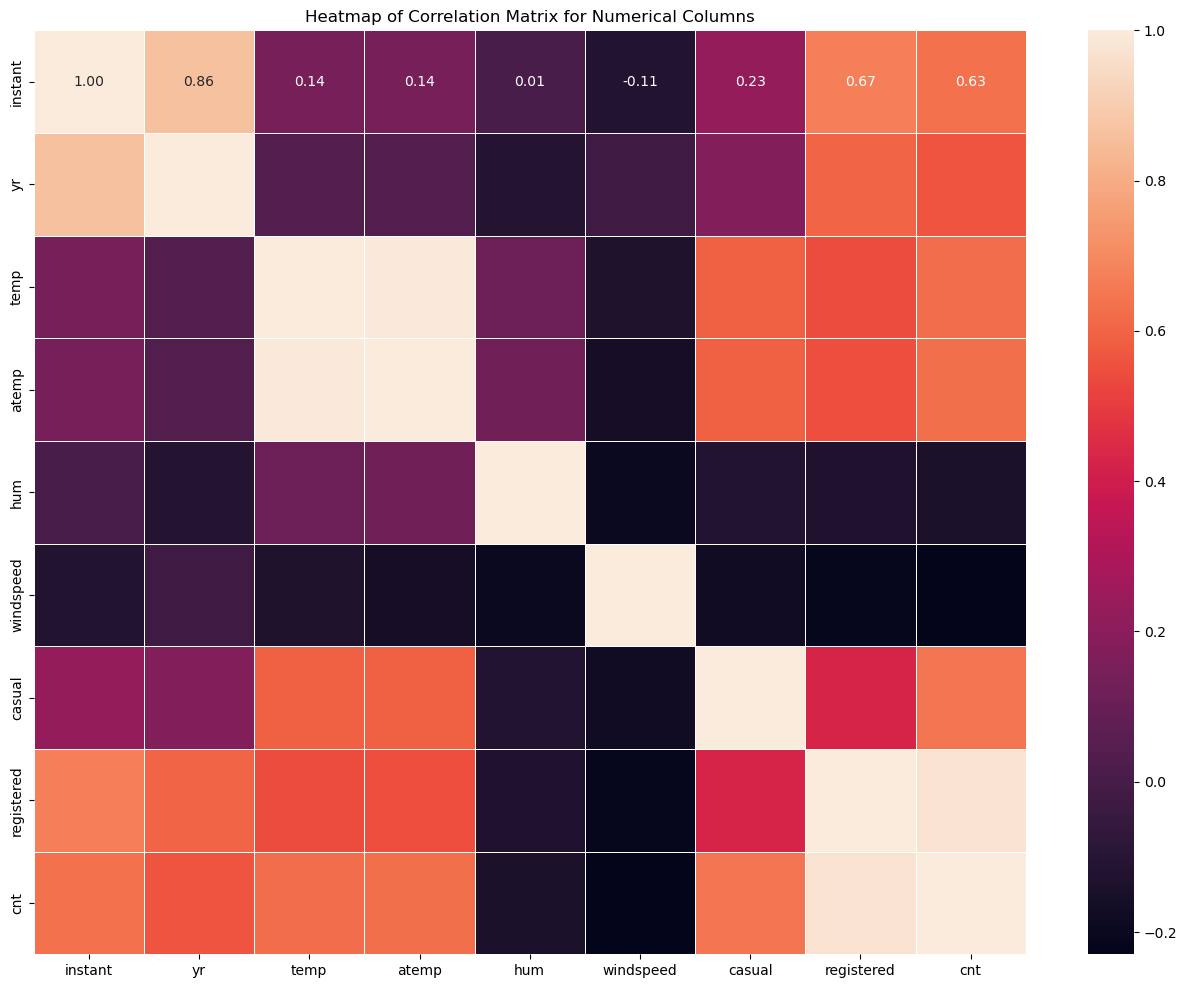

In [51]:
eda_multivariate_numeric(clean_df_day,num_day)

In [52]:
clean_df_day[num_day].corr()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.864518,0.140781,0.141839,0.009151,-0.114509,0.227655,0.670650,0.631828
yr,0.864518,1.000000,0.033617,0.031788,-0.110134,-0.024545,0.177644,0.601134,0.558890
temp,0.140781,0.033617,1.000000,0.991311,0.110187,-0.132950,0.589474,0.542021,0.624954
atemp,0.141839,0.031788,0.991311,1.000000,0.122516,-0.159931,0.587671,0.544191,0.626283
hum,0.009151,-0.110134,0.110187,0.122516,1.000000,-0.197247,-0.114391,-0.126697,-0.139486
windspeed,-0.114509,-0.024545,-0.132950,-0.159931,-0.197247,1.000000,-0.173497,-0.213491,-0.229613
casual,0.227655,0.177644,0.589474,0.587671,-0.114391,-0.173497,1.000000,0.427688,0.643913
registered,0.670650,0.601134,0.542021,0.544191,-0.126697,-0.213491,0.427688,1.000000,0.966987
cnt,0.631828,0.558890,0.624954,0.626283,-0.139486,-0.229613,0.643913,0.966987,1.000000


## Visualization & Explanatory Analysis

In [53]:
clean_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No,Saturday,Weekend/Holiday,Clear/Cloudy,9.84,14.395,75.0,0.0,0,1,1


In [54]:
clean_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No,Saturday,Weekend/Holiday,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,Weekend/Holiday,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Working Day,Clear/Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Working Day,Clear/Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Working Day,Clear/Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Once we clean the data for analysis and perform Exploratory Analysis for data understanding. Now We can define Business Questions

### Question 1: How the weather can affect the number of bike that are rented ?

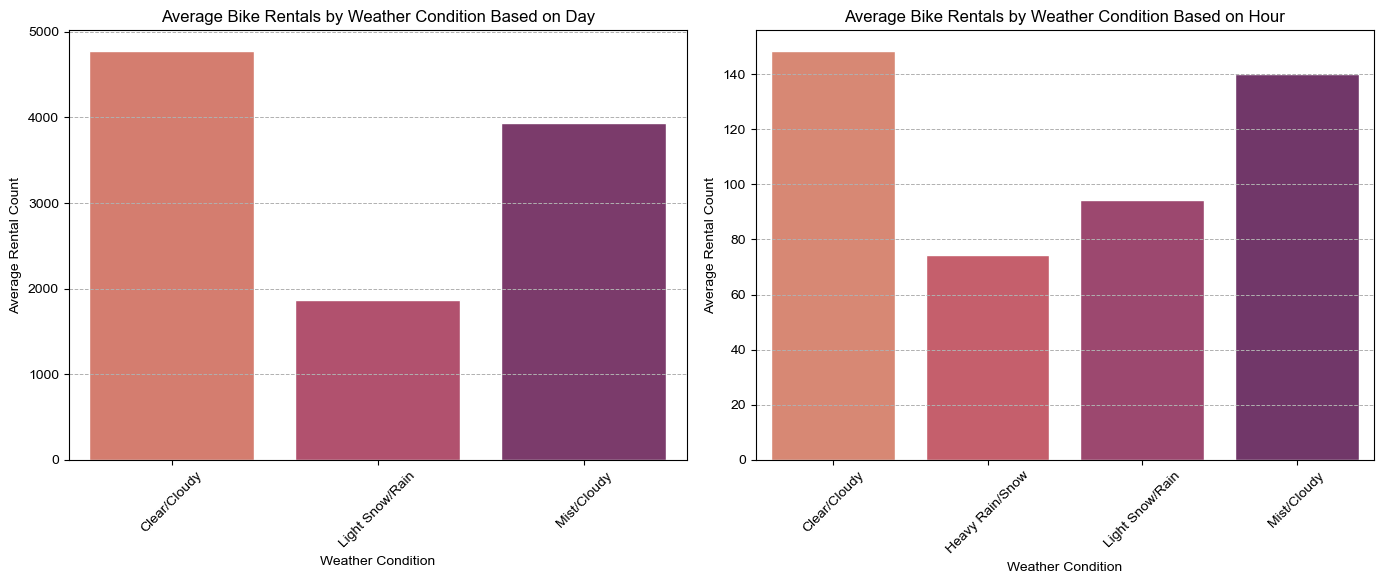

In [55]:
effect_day = clean_df_day.groupby('weathersit')['cnt'].mean().reset_index()
effect_hour = clean_df_hour.groupby('weathersit')['cnt'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.set(style="whitegrid")

sns.barplot(
    data=effect_day, 
    x='weathersit', 
    y='cnt', 
    palette="flare",
    ax=ax[0]
)
ax[0].set_title('Average Bike Rentals by Weather Condition Based on Day', fontsize=12)
ax[0].set_xlabel('Weather Condition', fontsize=10)
ax[0].set_ylabel('Average Rental Count', fontsize=10)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

sns.barplot(
    data=effect_hour, 
    x='weathersit', 
    y='cnt', 
    palette="flare",
    ax=ax[1]
)
ax[1].set_title('Average Bike Rentals by Weather Condition Based on Hour', fontsize=12)
ax[1].set_xlabel('Weather Condition', fontsize=10)
ax[1].set_ylabel('Average Rental Count', fontsize=10)
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()

plt.show()

### Question 2: What is the relationship between temperature and bike rentals?

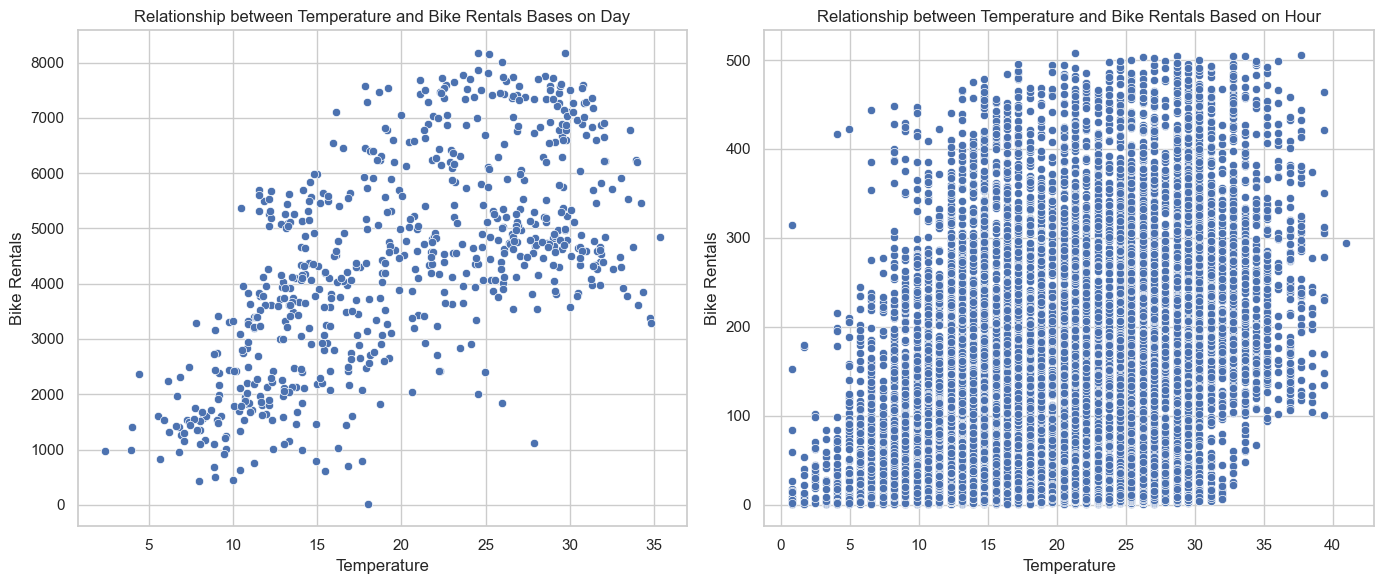

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=clean_df_day, x='temp', y='cnt', ax=ax[0])
ax[0].set_title('Relationship between Temperature and Bike Rentals Bases on Day')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Bike Rentals')

sns.scatterplot(data=clean_df_hour, x='temp', y='cnt', ax=ax[1])
ax[1].set_title('Relationship between Temperature and Bike Rentals Based on Hour')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Bike Rentals')

plt.tight_layout()
plt.show()

### Question 3: Which days of the week have the highest and lowest bike rental activity?

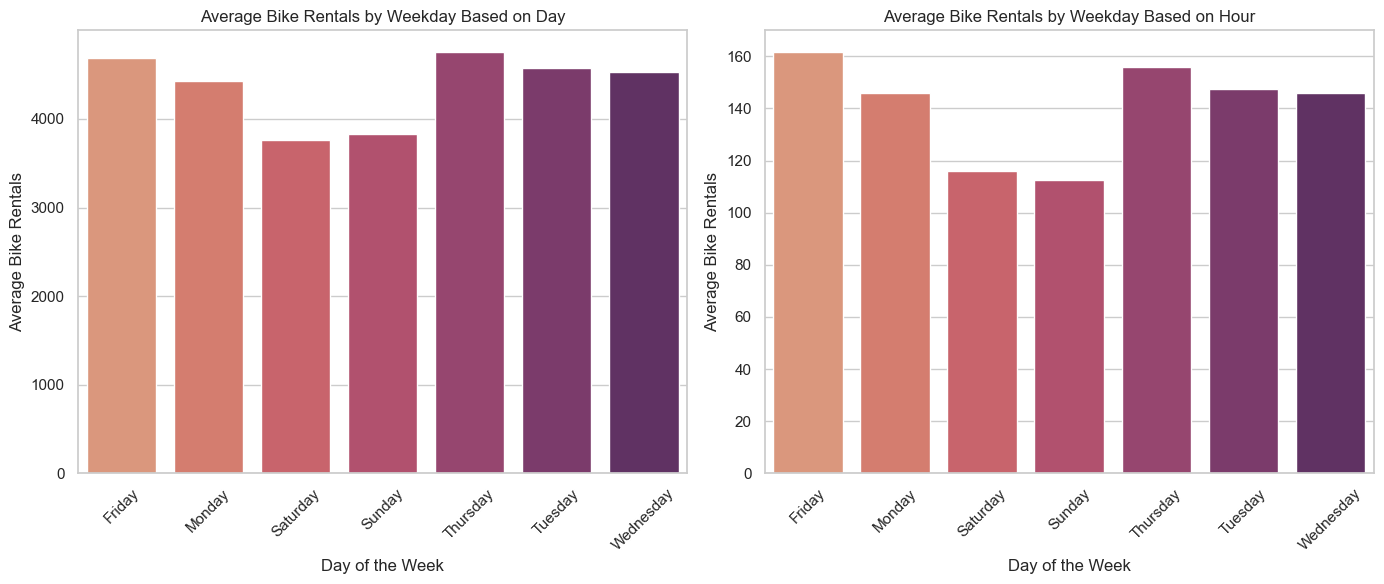

In [57]:
weekday_activity_day = clean_df_day.groupby('weekday')['cnt'].mean().reset_index()
weekday_activity_hour = clean_df_hour.groupby('weekday')['cnt'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=weekday_activity_day, x='weekday', y='cnt', palette='flare', ax=ax[0])
ax[0].set_title('Average Bike Rentals by Weekday Based on Day')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Average Bike Rentals')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=weekday_activity_hour, x='weekday', y='cnt', palette='flare', ax=ax[1])
ax[1].set_title('Average Bike Rentals by Weekday Based on Hour')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Average Bike Rentals')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Question 4: How does the time of day by hours influence bike rental patterns on weekdays compared to weekends?

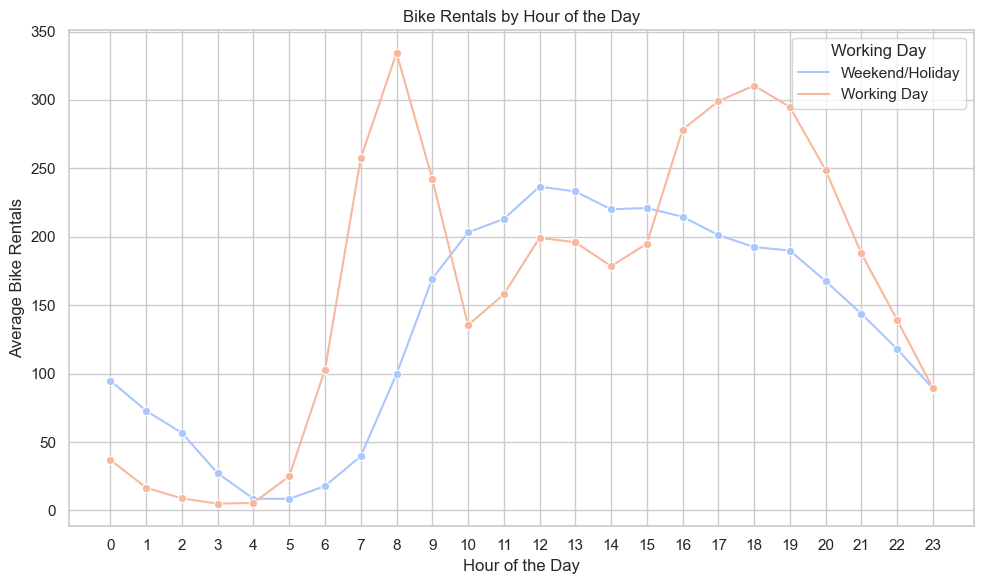

In [58]:
hourly_workingday = clean_df_hour.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_workingday, x='hr', y='cnt', hue='workingday', marker='o', palette='coolwarm')
plt.title('Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.legend(title='Working Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()

plt.show()

### Question 5: How do bike rental patterns difference between weekdays and weekends? (advanced analysis techniques clustering)

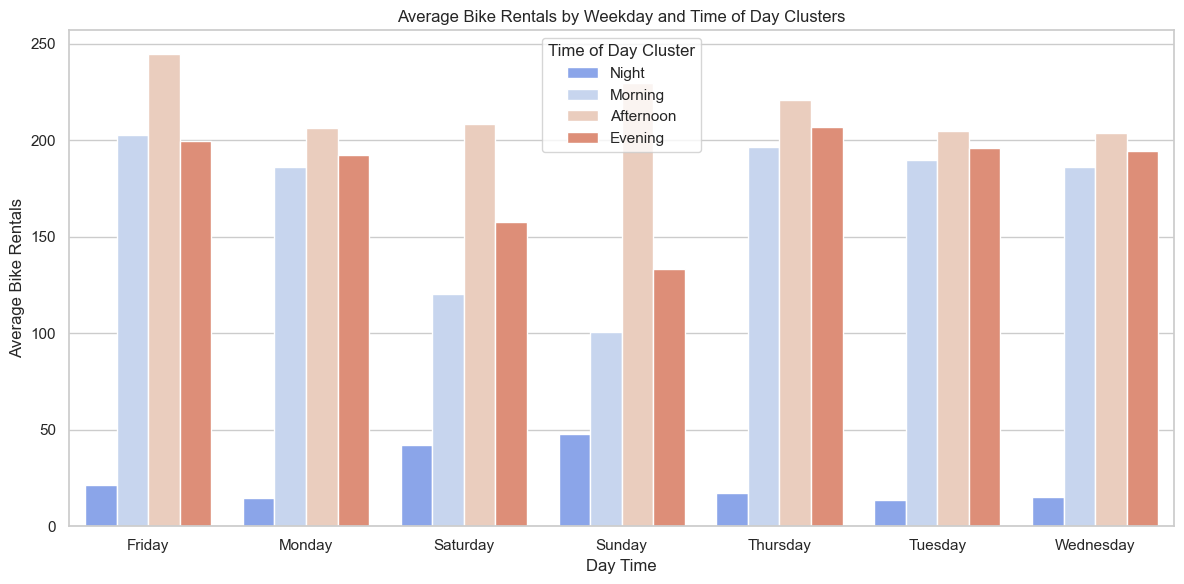

In [59]:
clean_df_hour['time_cluster'] = pd.cut(clean_df_hour['hr'], 
                                 bins=[0, 6, 12, 18, 24], 
                                 labels=['Night', 'Morning', 'Afternoon', 'Evening'], 
                                 right=False)

weekday_time_cluster = clean_df_hour.groupby(['weekday', 'time_cluster'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_time_cluster, x='weekday', y='cnt', hue='time_cluster', palette='coolwarm')
plt.title('Average Bike Rentals by Weekday and Time of Day Clusters')
plt.xlabel('Day Time')
plt.ylabel('Average Bike Rentals')
plt.legend(title='Time of Day Cluster')
plt.tight_layout()
plt.show()

## Conclusion

1. **Conclusion Question 1**:  
   Based on the results of the visualization, we can see that the weather influences the number of people who rent bicycles. The brighter the weather, the more bicycles will be rented. There is no significant difference between day and hour, indicating that these factors have similar effects.

2. **Conclusion Question 2**:  
   The visualization shows a clear positive relationship between temperature and bicycle rental. As temperatures rise, the number of rentals increases. Customers are reluctant to rent bicycles in cold weather, but as it warms, rentals increase.

3. **Conclusion Question 3**:  
   Based on the visualization, the highest bicycle rentals occur on Fridays and Thursdays, while the lowest rentals are on Saturdays and Sundays. This suggests that customers rent bicycles for activities such as school, travel, work, and other weekday activities.

4. **Conclusion Question 4**:  
   - **Weekdays**: There is a peak in bicycle rentals in the morning (around 08:00) and in the afternoon (around 17:00-18:00), corresponding to typical commuting hours.
   - **Non-Weekdays**: Rental activity is more spread out, with a peak around midday to mid-afternoon (12:00-14:00), likely due to recreational use.

5. **Conclusion Question 5**:  
   - **Weekdays**: Higher activity is observed in the morning and afternoon, driven by daily travel patterns.
   - **Weekends**: The distribution is more even throughout the day, with peak rentals shifting towards the afternoon and evening.